# Take-home project 1

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nekrut/bda/blob/main/Projects/Project%201.ipynb)

Write your PSU email address here: rbx5039@psu.edu

Share the notebook with aun1@psu.edu

## Load the data

In [1]:
import pandas as pd

variants = pd.read_csv(
    "https://raw.githubusercontent.com/nekrut/bda/main/data/pf_variants.tsv",
    sep="\t"
)

variants.head()

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,EFFECT,IMPACT,GENE,AA_POS,HGVS_C,HGVS_P
0,ERR042228.fq,NC_004318.2,657697,T,C,324.0,14,0.857143,0,"1,0,13,0",intergenic_region,MODIFIER,PF3D7_0414500-PF3D7_0414600,-1,n.657697T>C,NaN
1,ERR042228.fq,NC_004318.2,658447,A,G,453.0,32,0.718750,11,"5,1,10,16",intergenic_region,MODIFIER,PF3D7_0414500-PF3D7_0414600,-1,n.658447A>G,NaN
2,ERR042228.fq,NC_004318.2,659163,C,A,1928.0,56,0.982143,0,"0,0,21,35",missense_variant,MODERATE,PF3D7_0414600,55,c.165G>T,p.Glu55Asp
3,ERR042228.fq,NC_004318.2,659167,C,T,1887.0,56,0.964286,0,"0,0,21,35",missense_variant,MODERATE,PF3D7_0414600,54,c.161G>A,p.Cys54Tyr
4,ERR042228.fq,NC_004318.2,660292,T,C,104.0,34,0.176471,0,"6,8,2,4",intergenic_region,MODIFIER,PF3D7_0414600-PF3D7_0414700,-1,n.660292T>C,NaN


## Instructions

Our goal is to understand whether the malaria parasite ([*Plasmodium falciparum*](https://brc-analytics.dev.clevercanary.com/data/organisms/5833)) infecting these individuals is resistant to [Pyrimethamine](https://en.wikipedia.org/wiki/Pyrimethamine)---an antimalarial drug. Resistance to Pyrimethamine is conferred by a mutation in `PF3D7_0417200` (*dhfr*) gene [Cowman1988](https://doi.org/10.1073/pnas.85.23.9109). Given sequencing data from four individuals we will determine which one of them is infected with a *Plasmodium falciparum* carrying mutations in this gene.

Variant calls in the provided Pandas data frame represent analysis of four samples: two from Ivory Coast and two from Colombia:

| Accession | Location |
|------------|------------|
| [ERR636434](https://www.ncbi.nlm.nih.gov/sra/?term=ERR636434) | Ivory coast |
| [ERR636028](https://www.ncbi.nlm.nih.gov/sra/?term=ERR636028) | Ivory coast |
| [ERR042232](https://www.ncbi.nlm.nih.gov/sra/?term=ERR042232) | Colombia |
| [ERR042228](https://www.ncbi.nlm.nih.gov/sra/?term=ERR042228) | Colombia |

These accessions correspond to datasets stored in the [Sequence Read Archive](https://www.ncbi.nlm.nih.gov/sra) at NCBI.

(data from [MalariaGen](https://www.malariagen.net/data_package/open-dataset-plasmodium-falciparum-v70/) )

## Specifics

- Filter variants falling within the *dhfr* gene
- Restrict variants to missense variants only using the effect column.
- You are specifically interested in variant at amino acid position 108
- Create a graph that shows samples vs variant coordinates, in which graph marks are proportional to alternative allele frequencies (**AF** column)
- Create a graph showing a world map in which allele frequencies of these two samples are represented as pie charts within the map of Colombia and within the map of Ivory Coast.  to be more specific, for each location you have two samples. Each of these samples will have an allele frequency at the resistance side. Use these allele frequencies as areas on the pie chart

> You can use any AI you want (preferably the one integrated in Colab) but you will never get exactly what you want, so you will have to adjust it. You will have to explain to me what the steps were.


In [2]:
dhfr = variants[variants["GENE"] == "PF3D7_0417200"] #Filter variants falling within the dhfr gene

dhfr_missense = dhfr[dhfr["EFFECT"] == "missense_variant"] #Restrict variants to missense variants only using the effect column.

dhfr_108 = dhfr_missense[dhfr_missense["AA_POS"] == 108] #Sspecifically focus on variant at amino acid position 108

dhfr_108[["Sample", "POS", "AA_POS", "AF"]]





,Sample,POS,AA_POS,AF
147,ERR042228.fq,748410,108,0.957143
830,ERR636028.fq,748410,108,0.991416


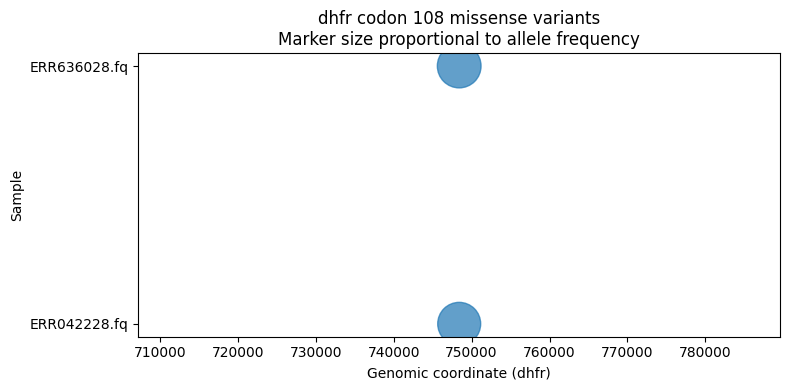

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.scatter(
    dhfr_108["POS"],
    dhfr_108["Sample"],
    s=dhfr_108["AF"] * 1000,
    alpha=0.7
)

plt.xlabel("Genomic coordinate (dhfr)")
plt.ylabel("Sample")
plt.title("dhfr codon 108 missense variants\nMarker size proportional to allele frequency")

plt.tight_layout()
plt.show()


In [6]:
sample_location = {
    "ERR636434.fq": "Ivory coast",
    "ERR636028.fq": "Ivory coast",
    "ERR042232.fq": "Colombia",
    "ERR042228.fq": "Colombia"
}

dhfr_108["Location"] = dhfr_108["Sample"].map(sample_location)


/tmp/ipython-input-3820505940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dhfr_108["Location"] = dhfr_108["Sample"].map(sample_location)


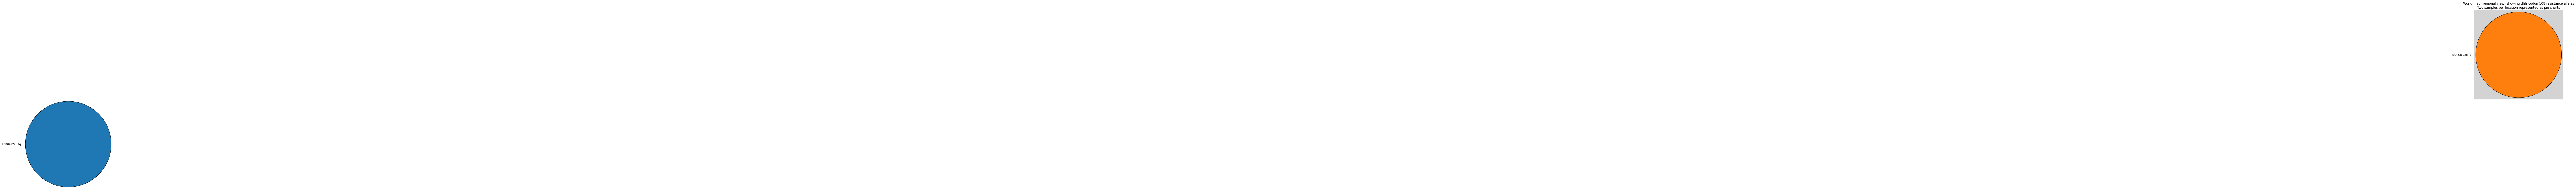

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

world = gpd.read_file(
    "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
)

# 在国家内部选定 pie 放置点（不算中心）
country_coords = {
    "Ivory coast": (-5.5, 7.0),
    "Colombia": (-74.0, 4.5)
}

fig, ax = plt.subplots(figsize=(10, 6))

# 世界地图作为底图
world.plot(ax=ax, color="lightgray", edgecolor="black")

# 关键：限制视角，只保留相关区域
ax.set_xlim(-90, 10)     # 覆盖 Colombia + Ivory Coast
ax.set_ylim(-10, 20)

# 每个 location 一个 pie（两个 sample）
for location, group in dhfr_108.groupby("Location"):
    lon, lat = country_coords[location]

    sizes = group["AF"].values      # AF 只用于扇区面积
    labels = group["Sample"].values

    ax.pie(
        sizes,
        center=(lon, lat),
        radius=1.2,                 # 固定半径
        labels=labels,
        labeldistance=1.1,
        wedgeprops=dict(edgecolor="black")
    )

ax.set_title(
    "World map (regional view) showing dhfr codon 108 resistance alleles\n"
    "Two samples per location represented as pie charts"
)

ax.set_axis_off()
plt.show()
